# 회귀문제 실습

- 보험료 예측 데이터셋
    - 개인의 여러 특징을 기반으로 미래의 의료비를 예측하여 보험사에서 보험료 청구 결정을 내리는데 활용
    - 학습세트: https://drive.google.com/file/d/1RvVYXqX9lIOZZ0TNYhYhmhypnPMeWyCt/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/1h94BwZ7X_kzLYZkVorjCc8ghWmgj0SIX/view?usp=sharing

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
DATA_PATH = "data/"

In [4]:
import numpy as np
import pandas as pd

train = pd.read_csv(f"{DATA_PATH}insurance_train.csv")
test = pd.read_csv(f"{DATA_PATH}insurance_test.csv")

train.shape, test.shape

((936, 7), (402, 6))

In [5]:
train.head()

,age,sex,bmi,children,smoker,region,target
0,37,male,36.190,0,no,southeast,19214.70553
1,18,male,29.370,1,no,southeast,1719.43630
2,28,male,26.980,2,no,northeast,4435.09420
3,47,male,36.200,1,no,southwest,8068.18500
4,32,male,27.835,1,no,northwest,4454.40265


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   target    936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.3+ KB


In [7]:
train.nunique()

age          47
sex           2
bmi         471
children      6
smoker        2
region        4
target      935
dtype: int64

In [8]:
train["sex"].unique(), train["smoker"].unique()

(array(['male', 'female'], dtype=object), array(['no', 'yes'], dtype=object))

In [9]:
sex_dict = {"male": 1, "female": 0}
smoker_dict = {"yes": 1, "no": 0}

In [10]:
train["sex"] = train["sex"].map(sex_dict)
train["smoker"] = train["smoker"].map(smoker_dict)

test["sex"] = test["sex"].map(sex_dict)
test["smoker"] = test["smoker"].map(smoker_dict)

In [11]:
train_ft = train.iloc[:,:-1].copy()
test_ft = test.copy()

train_ft.shape, test_ft.shape

((936, 6), (402, 6))

In [12]:
train_ft

,age,sex,bmi,children,smoker,region
0,37,1,36.190,0,0,southeast
1,18,1,29.370,1,0,southeast
2,28,1,26.980,2,0,northeast
3,47,1,36.200,1,0,southwest
4,32,1,27.835,1,0,northwest
...,...,...,...,...,...,...
931,19,1,25.555,0,0,northwest
932,18,0,36.850,0,0,southeast
933,48,1,34.300,3,0,southwest
934,34,1,22.420,2,0,northeast


In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
cols = ["region"]

enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [14]:
train_ft[enc.get_feature_names_out()] = enc.transform(train_ft[cols]).toarray()

In [15]:
test_ft[enc.get_feature_names_out()] = enc.transform(test_ft[cols]).toarray()

In [16]:
train_ft = train_ft.drop(columns="region")
test_ft = test_ft.drop(columns="region")

In [17]:
train_ft.shape, test_ft.shape

((936, 9), (402, 9))

In [18]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [20]:
train_ft[train_ft.columns] = scaler.transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

In [21]:
target = train["target"]

In [22]:
train["target"].describe()

count      936.000000
mean     13361.425758
std      12229.109539
min       1121.873900
25%       4819.842913
50%       9447.316375
75%      16482.615900
max      63770.428010
Name: target, dtype: float64

## 선형 회귀(Linear Regression)
- 종속 변수 y와 한 개 이상의 독립 변수 X와의 관계를
직선으로 표현하는 방법
- 원인이 되는 설명변수(독립변수,Feature)에 따른 종속변수(목표변수, target)의 결과 예측
- 선형 회귀에서 학습은 x와 y가 주어졌을 때 x와 y를 가장 잘 설명하는 w와 b를 찾는 것
$$
y = b_0 + b_1x
$$
$$
y = b_0 + b_1x_1 +  b_2x_2 + ... + b_nx_n
$$





## 경사 하강법(Gradient Descent)
- 주어진 함수의 최솟값을 구하는 대표적인 수치 최적화 방법
- 머신러닝 및 딥러닝 알고리즘을 학습시킬때 사용되는 최적화 방법

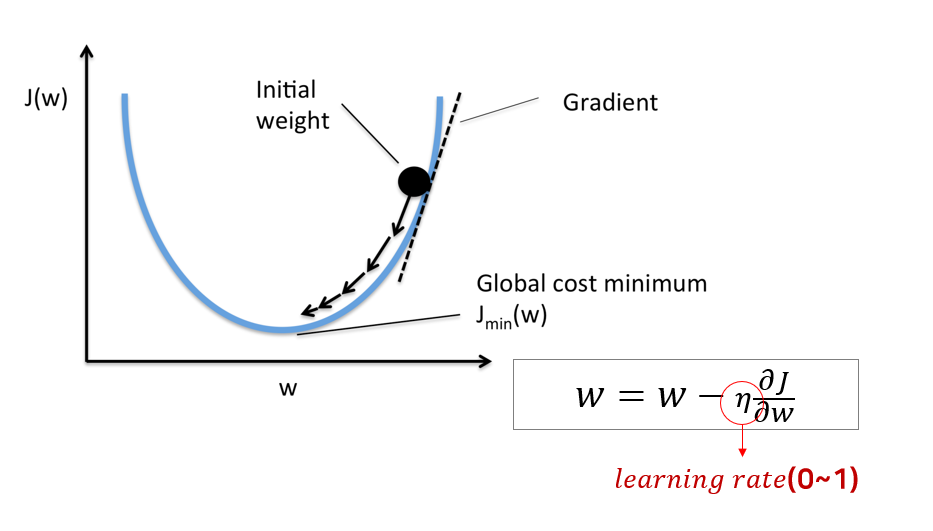

## 회귀에서 사용되는 손실함수

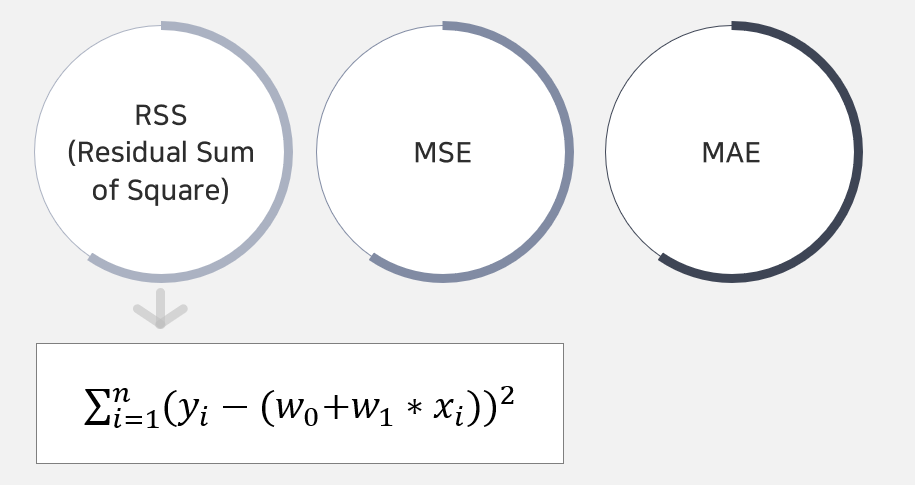

## LinearRegression
- 최소제곱법을 이용한 선형회귀
    - RSS를 최소화하는 회귀 계수를 선택하는 통계적 접근법
    - RSS를 각각의 회귀계수들로 미분했을때 0이 되는 해를 구하는 방법
$$
b_1 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}
$$
<br>
$$
b_0 = \bar{y}-b_1\bar{x}
$$

In [23]:
target.mean(), target.median(), target.skew()

(np.float64(13361.425757883548),
 np.float64(9447.316375),
 np.float64(1.5316992039020136))

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [25]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

- cv 점수 확인해보기

In [26]:
scores = cross_val_score(model, train_ft, target, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
scores

array([-6877.50059715, -5597.88593328, -6757.23510238, -6075.86007517,
       -5559.84058239])

In [27]:
-scores.mean()

np.float64(6173.6644580734155)

In [28]:
model.fit(train_ft, target)

LinearRegression()

In [29]:
model.coef_ # 가중치

array([ 1.25804448e+04,  2.60776351e+02,  1.16590115e+04,  2.27618338e+03,
        2.40790908e+04, -7.41071017e+17, -7.41071017e+17, -7.41071017e+17,
       -7.41071017e+17])

In [30]:
model.intercept_ # 편향값

np.float64(7.410710171228913e+17)

## 규제 선형 회귀(Regularized Linear Regression)
- 선형 회귀에서 학습 데이터에 적합 되면서
회귀 계수가 기하급수적으로 커지는 것을 제어
- 선형 회귀는 RSS 최소화하는 것에만 집중하기 때문에 회귀 계수가 커져 심해진 변동성으로 인한 예측 성능 저하
- 규제 선형 회귀는 RSS와 회귀 계수를 동시에 최소화 하는 것




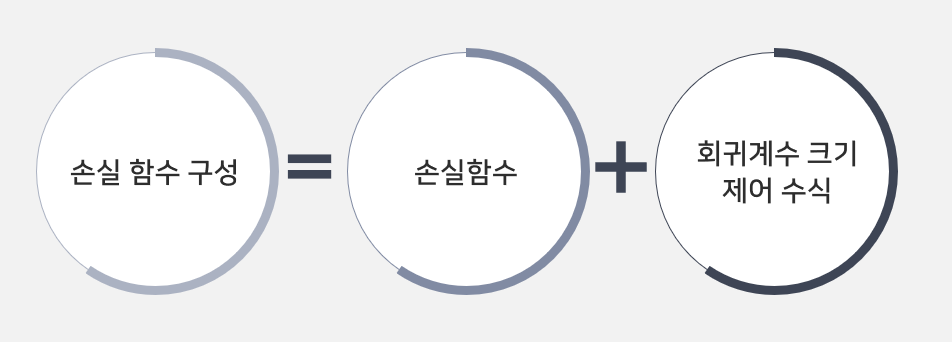

### 규제는 크게 L2 와 L1 방식으로 구분
- Alpha값을 이용하여 가중치를 규제
- Alpha값이 0이라면 손실 함수 식은 기존과 동일
- Alpha값이 클수록 손실 함수에 페널티가 더 가해져 가중치 감소



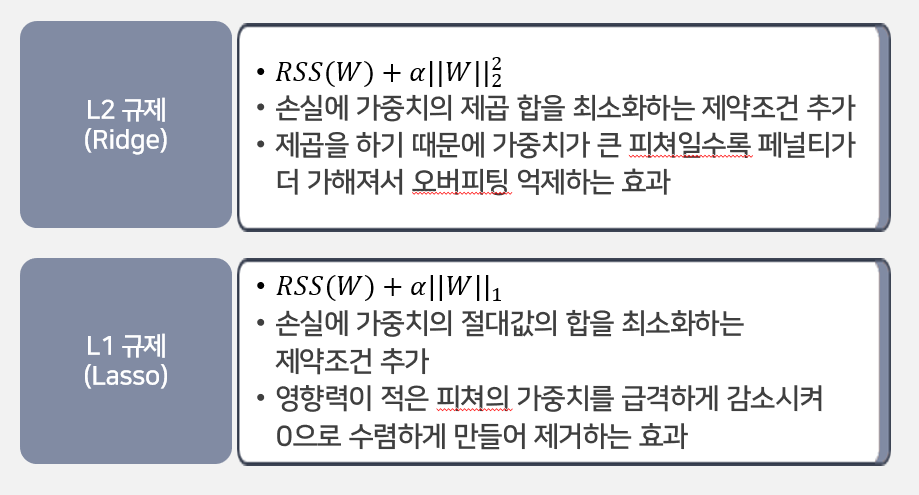

## Ridge 클래스
- 경사하강법을 이용한 선형회귀에 L2 규제를 적용한 모델
- 오버피팅을 억제하는 효과
- alpha 값을 이용해서 가중치 규제
    - alpha 값이 클수록 가중치에 규제가 더 가해져서 가중치가 감소

In [31]:
from sklearn.linear_model import Ridge
model = Ridge(random_state=42, alpha=0)

scores = cross_val_score(model, train_ft, target, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
-scores.mean()

np.float64(6177.680405364655)

## Lasso 클래스
- 경사하강법을 이용한 선형회귀에 L1 규제를 적용한 모델
- 영향력이 적은 피처의 가중치를 0으로 수렴하게 만들기 때문에 특성선택 효과가 있음

In [32]:
from sklearn.linear_model import Lasso
model = Lasso(random_state=42, alpha=0.5)

scores = cross_val_score(model, train_ft, target, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
-scores.mean()

np.float64(6177.371121169253)

## ElasticNet 클래스
- 경사하강법을 이용한 선형회귀에 L1, L2 를 조합하여 적용한 모델

In [33]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=0.5, random_state=42)
scores = cross_val_score(model, train_ft, target, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
-scores.mean()

np.float64(10279.857023464308)

## 로지스틱 회귀(Logistic Regression)
- Regression(회귀)라는 단어가 들어가지만 분류 모델
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 경사하강법을 이용하여 모델 파라미터를 업데이트 함
- 시그모이드(Sigmoid) 함수를 이용하여 0~1사이의 확률을 출력

- 시그모이드 함수
$$
S(x) = \frac{1}{1+e^{-x}}
$$


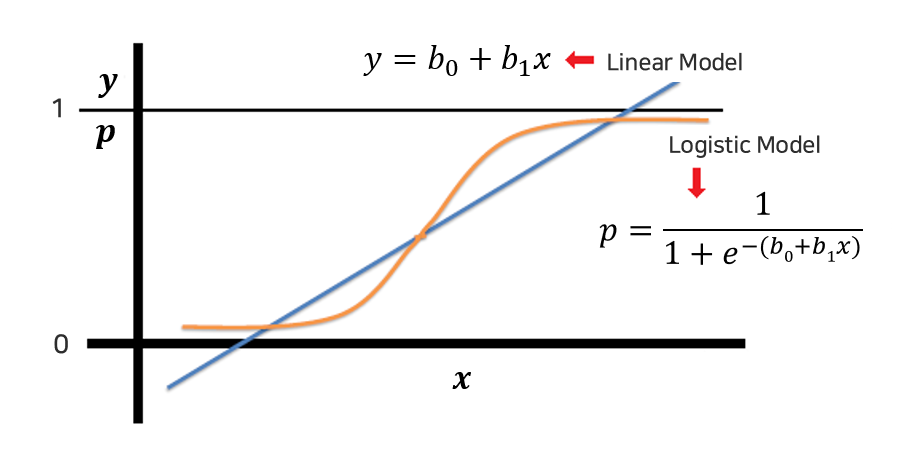

- $y=e^x$ 의 그래프

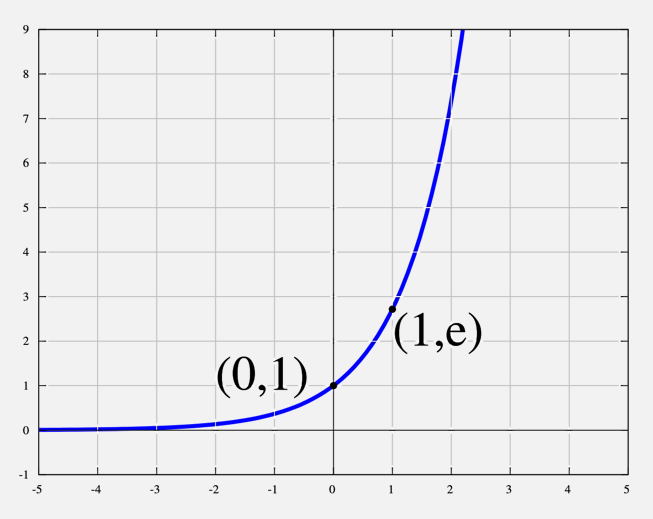

## LogisticRegression 클래스




- 주요 파라미터
    - random_state : 시드값
    - penalty : 'l2'(기본값) , 'l1'   'elasticnet', None
    - solver: 모델 파라미터 최적화 알고리즘
        - 'lbfgs'(기본값): l2, None 일 경우 사용
        - 'liblinear': l2, l1 일 경우 사용
        - 'newton-cg': l2, None 일 경우 사용
        - 'newton-cholesky': l2, None 일 경우 사용
        - 'sag': l2, None 일 경우 사용
        - 'saga': l2, l1, 'elasticnet', None 일 경우 사용
    - C: 1.0(기본값), 양의 실수를 줘야 하며 값이 작을 수록 모델 파라미터에 규제를 더 가한다.
    - max_iter: 100(기본값), 최대 반복 횟수
    - tol: 1e-4(기본값) , 학습 중지 기준이 되는 허용 오차

# 타이타닉 데이터 불러와서 전처리 후 교차검증 점수(AUC) 확인

- 데이터 불러오기

In [34]:
train = pd.read_csv(f"{DATA_PATH}titanic_train.csv")
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv")

- 특성으로 사용할 변수 선택

In [35]:
cols = ["pclass", "gender", "age", "sibsp", "parch", "fare", "embarked"]
train_ft = train[cols].copy()
test_ft = test[cols].copy()

In [36]:
train_ft

,pclass,gender,age,sibsp,parch,fare,embarked
0,1,male,71.0,0,0,49.5042,C
1,3,male,34.0,0,0,8.0500,S
2,3,male,29.0,3,1,22.0250,S
3,2,female,18.0,1,1,13.0000,S
4,1,male,48.0,0,0,26.5500,S
...,...,...,...,...,...,...,...
911,1,male,35.0,0,0,512.3292,C
912,3,male,NaN,0,0,24.1500,Q
913,3,male,36.0,0,0,7.4958,S
914,3,male,38.0,0,0,7.8958,S


In [37]:
target = train["survived"]
target

0      0
1      0
2      0
3      1
4      1
      ..
911    1
912    0
913    0
914    0
915    0
Name: survived, Length: 916, dtype: int64

- 데이터 정제

In [38]:
train_ft.isnull().sum()

pclass        0
gender        0
age         180
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [39]:
test_ft.isnull().sum()

pclass       0
gender       0
age         83
sibsp        0
parch        0
fare         1
embarked     2
dtype: int64

In [40]:
age_mean = train_ft["age"].mean()
embarked_mode = train_ft["embarked"].mode()[0]

In [41]:
train_ft["age"] = train_ft["age"].fillna(age_mean)

In [42]:
test_ft.groupby("pclass")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,93.0,81.343096,67.183299,0.0000,30.50,59.4000,106.425,263.00
2,82.0,20.743445,13.684048,0.0000,13.00,13.8625,26.000,73.50
3,217.0,12.662634,9.939073,3.1708,7.75,8.0500,14.500,69.55


In [43]:
test_ft[test_ft["fare"].isnull() == True]

,pclass,gender,age,sibsp,parch,fare,embarked
186,3,male,60.5,0,0,NaN,S


In [44]:
test_ft["age"] = test_ft["age"].fillna(age_mean)
test_ft["fare"] = test_ft["fare"].fillna(12.662634)
test_ft["embarked"] = test_ft["embarked"].fillna(embarked_mode)

In [45]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [46]:
gender_dict = {"male": 1, "female": 0}

train_ft["gender"] = train_ft["gender"].map(gender_dict)
test_ft["gender"] = test_ft["gender"].map(gender_dict)

- 원핫인코딩

In [47]:
cols = ["pclass", "embarked"]

enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [48]:
enc_cols = enc.get_feature_names_out()
enc_cols

array(['pclass_1', 'pclass_2', 'pclass_3', 'embarked_C', 'embarked_Q',
       'embarked_S'], dtype=object)

In [49]:
train_ft[enc_cols] = enc.transform(train_ft[cols]).toarray()
test_ft[enc_cols] = enc.transform(test_ft[cols]).toarray()

In [50]:
train_ft = train_ft.drop(["pclass", "embarked"], axis=1)
test_ft = test_ft.drop(["pclass", "embarked"], axis=1)

In [51]:
train_ft.shape, test_ft.shape

((916, 11), (393, 11))

- min-max 스케일링

In [52]:
scaler = MinMaxScaler()
train_ft = scaler.fit_transform(train_ft)
test_ft = scaler.transform(test_ft)

In [53]:
train_ft.shape, test_ft.shape

((916, 11), (393, 11))

- 로지스틱 모델을 이용하여 cv점수 확인하기

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, penalty='l2')
scores = cross_val_score(model,train_ft,target, scoring="roc_auc", cv=cv, n_jobs=-1)
scores.mean()

np.float64(0.897080286102556)